In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np

from matplotlib import rc, colors, ticker
import matplotlib.pyplot as plt

from sunpy.net import Fido, attrs as a
import astropy.units as u
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import SkyCoord
import sunpy.map
from matplotlib.patches import ConnectionPatch
from matplotlib import colors

from mhsflex.field2d import Field2dData, check_fluxbalance, alpha_HS04
from mhsflex.field3d import Field3dData, calculate_magfield

from mhsflex.vis import plot

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_06_14_01_30_tai_magnetogram.fits"
# -150, 10, -350, -400
data2d = Field2dData.from_fits_SDO(path)


arcsec arcsec 0.504043 0.504043
2.443667127239231e-06 2.443667127239231e-06
150934254918.71
150934.25491870998
0.3688330771191978 0.3688330771191978


In [6]:
print(data2d.nz)

222


In [ ]:
check_fluxbalance(data2d)

In [ ]:
alpha = 0.01

length_scale = float(2.0)  # Normalising length scale for Seehafer

length_scale_x = 2.0 * data2d.nx * data2d.px
length_scale_y = 2.0 * data2d.ny * data2d.py

length_scale_x_norm = length_scale_x / length_scale 
length_scale_y_norm = length_scale_y / length_scale 

kx_arr = np.arange(data2d.nf) * np.pi / length_scale_x_norm  # [0:nf_max]
ky_arr = np.arange(data2d.nf) * np.pi / length_scale_y_norm  # [0:nf_max]
one_arr = 0.0 * np.arange(data2d.nf) + 1.0

ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]

# kx^2 + ky^2

k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale_x_norm) ** 2 + (np.pi / length_scale_y_norm) ** 2
k2_arr[1, 0] = (np.pi / length_scale_x_norm) ** 2 + (np.pi / length_scale_y_norm) ** 2
k2_arr[0, 1] = (np.pi / length_scale_x_norm) ** 2 + (np.pi / length_scale_y_norm) ** 2

# Need k^2 > alpha^2/(1-2a) and k^2 > alpha^2

limit = 1 / 2 * (1 - alpha**2 / k2_arr)

print(limit.min())

In [7]:
a = 0.38

In [5]:
# data3d = calculate_magfield(data2d, a, 1.0, alpha, 2.0, 0.2)
path2save = "/Users/lilli/Desktop/Thesis/May2024_flare/May6_mhs"
# data3d.save(path2save)

data3d_6May = Field3dData.load(path2save)

In [6]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dp_6May.npy", data3d_6May.dpressure)

In [7]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dd_6May.npy", data3d_6May.ddensity)

In [ ]:
folder = "/Users/lilli/Desktop/Thesis/May2024_flare/May6_mhs"

plot(data3d_6May, view="los", save=True, path=folder)

In [8]:
# path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_07_14_01_30_tai_magnetogram.fits"
# # -170, 220, -370, -190
# data2d = Field2dData.from_fits_SDO(path)
# data3d = calculate_magfield(data2d, a, 1.0, alpha, 2.0, 0.2)
path2save = "/Users/lilli/Desktop/Thesis/May2024_flare/May7_mhs"
# data3d.save(path2save)

data3d_7May = Field3dData.load(path2save)

In [9]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dp_7May.npy", data3d_7May.dpressure)

In [10]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dd_7May.npy", data3d_7May.ddensity)

In [ ]:
folder = "/Users/lilli/Desktop/Thesis/May2024_flare/May7_mhs"

plot(data3d_7May, view="side", save=True, path=folder)

In [11]:
# path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_08_14_01_30_tai_magnetogram.fits"
# # # -170, 430, -370, 20
# data2d = Field2dData.from_fits_SDO(path)
# data3d = calculate_magfield(data2d, a, 1.0, alpha, 2.0, 0.2)
path2save = "/Users/lilli/Desktop/Thesis/May2024_flare/May8_mhs"
# data3d.save(path2save)

data3d_8May = Field3dData.load(path2save)

In [12]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dp_8May.npy", data3d_8May.dpressure)

In [13]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dd_8May.npy", data3d_8May.ddensity)

In [ ]:
folder = "/Users/lilli/Desktop/Thesis/May2024_flare/May8_mhs"

plot(data3d_8May, view="los", save=True, path=folder)

In [ ]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_09_14_01_30_tai_magnetogram.fits"
# -170, 630, -370, 220
data2d = Field2dData.from_fits_SDO(path)

In [3]:
# data3d = calculate_magfield(data2d, a, 1.0, alpha, 2.0, 0.2)
path2save = "/Users/lilli/Desktop/Thesis/May2024_flare/May9_mhs"
# data3d.save(path2save)

data3d_9May = Field3dData.load(path2save)

In [4]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dp_9May.npy", data3d_9May.dpressure)

In [5]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dd_9May.npy", data3d_9May.ddensity)

In [ ]:
folder = "/Users/lilli/Desktop/Thesis/May2024_flare/May9_mhs"

plot(data3d_9May, view="los", save=True, path=folder)

In [4]:
dp_6May = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dp_6May.npy")

In [5]:
dp_7May = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dp_7May.npy")
dp_8May = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dp_8May.npy")
dp_9May = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dp_9May.npy")

In [5]:
dp_before = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dp_before.npy")
dp_after = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dp_after.npy")
dd_before = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dd_before.npy")
dd_after = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dd_after.npy")

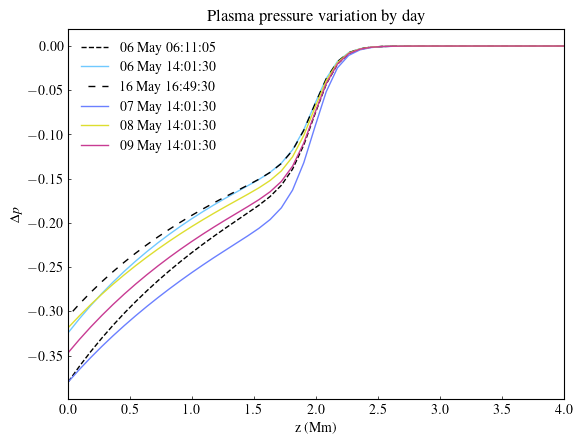

In [21]:
fig, ax1 = plt.subplots()

ax1.plot(
    data2d.z,
    dp_before[137, 466, :],
    linewidth=1.0,
    color=c3,
    linestyle="dashed",
    label=r"06 May 06:11:05",
)
ax1.plot(
    data2d.z,
    dp_6May[148, 526, :],
    linewidth=1.0,
    color=c1,
    label=r"06 May 14:01:30",
)
ax1.plot(
    data2d.z,
    dp_after[164, 365, :],
    linewidth=1.0,
    color=c3, 
    linestyle=(5,(5,5)),
    label=r"16 May 16:49:30",
)
ax1.plot(
    data2d.z,
    dp_7May[190, 511, :],
    linewidth=1.0,
    color=c2,
    label=r"07 May 14:01:30",
)
ax1.plot(
    data2d.z,
    dp_8May[205, 481, :],
    linewidth=1.0,
    color=c8,
    label=r"08 May 14:01:30",
)
ax1.plot(
    data2d.z,
    dp_9May[225, 215, :],
    linewidth=1.0,
    color=c5,
    label=r"09 May 14:01:30",
)

ax1.set_xlabel("z (Mm)")
plt.xlim([0, 4.0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

plt.title(
    r"Plasma pressure variation by day"
)
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"$\Delta p$")

plt.legend(lines, labels, frameon=False)
plotname =  "/Users/lilli/Desktop/Thesis/May2024_flare/dpressure.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [4]:
dd_6May = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dd_6May.npy")
dd_7May = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dd_7May.npy")
dd_8May = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dd_8May.npy")
dd_9May = np.load("/Users/lilli/Desktop/Thesis/May2024_flare/dd_9May.npy")

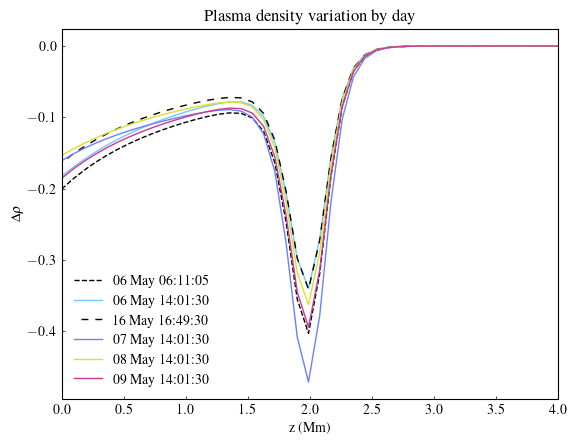

In [8]:
fig, ax1 = plt.subplots()

ax1.plot(
    data2d.z,
    dd_before[137, 466, :],
    linewidth=1.0,
    color=c3,
    linestyle="dashed",
    label=r"06 May 06:11:05",
)
ax1.plot(
    data2d.z,
    dd_6May[148, 526, :],
    linewidth=1.0,
    color=c1,
    label=r"06 May 14:01:30",
)
ax1.plot(
    data2d.z,
    dd_after[164, 365, :],
    linewidth=1.0,
    color=c3, 
    linestyle=(5,(5,5)),
    label=r"16 May 16:49:30",
)
ax1.plot(
    data2d.z,
    dd_7May[190, 511, :],
    linewidth=1.0,
    color=c2,
    label=r"07 May 14:01:30",
)
ax1.plot(
    data2d.z,
    dd_8May[205, 481, :],
    linewidth=1.0,
    color=c8,
    label=r"08 May 14:01:30",
)
ax1.plot(
    data2d.z,
    dd_9May[225, 215, :],
    linewidth=1.0,
    color=c5,
    label=r"09 May 14:01:30",
)


ax1.set_xlabel("z (Mm)")
plt.xlim([0, 4.0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

plt.title(
    r"Plasma density variation by day"
)
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"$\Delta \rho$")

plt.legend(lines, labels, frameon=False)
plotname =  "/Users/lilli/Desktop/Thesis/May2024_flare/ddensity.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [3]:
folder = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms"

In [4]:
result = Fido.search(
    a.Time("2024/5/6 14:00:00", "2024/5/6 14:01:00"),
    a.Instrument.hmi,
    a.Physobs("LOS_magnetic_field"),
)

In [ ]:
# result

In [ ]:
# files = Fido.fetch(result[:, 0], path=folder + "/{file}")

In [3]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_06_14_01_30_tai_magnetogram.fits"
hmi_image = sunpy.map.Map(path).rotate()

In [ ]:
data2d = Field2dData.from_fits_SDO(path)

In [5]:
x_grid, y_grid = np.meshgrid(data2d.x, data2d.y)
norm = colors.SymLogNorm(500, vmin=-7.5e2, vmax=7.5e2)

In [ ]:
data2d.bz.min()

In [6]:
from matplotlib.patches import Rectangle

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
C = ax.contourf(
    x_grid,
    y_grid,
    data2d.bz,
    100,
    cmap=cmap,
    # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
    # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
)
# CS = ax.contour(
#     x_grid,
#     y_grid,
#     data2d.bz,
#     levels=(500, 2000),
#     colors=[(0.576, 1.000, 0.271)],
#     linewidths=1.0,
# )
ax.text(200, 70, "A", color=c5, fontsize=16)
# ax.text(115, 65, "B", color=(0.576, 1.000, 0.271), fontsize=14)
ax.scatter(data2d.x[526], data2d.y[148], s=20, marker='D', facecolors='none', edgecolors=c2)
currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle(
        (170, 30), 65, 70, fill=None, alpha=1, zorder=10, color=c5, lw=1.0
    )
)

ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
# fig.colorbar(C, shrink=0.5)
ax.set_box_aspect(data2d.ny / data2d.nx)
plotname =  "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/May6.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_06_14_01_30_tai_magnetogram.fits"
hmi_image = sunpy.map.Map(path).rotate()
top_right = SkyCoord(10 * u.arcsec, -150 * u.arcsec, frame=hmi_image.coordinate_frame)
bottom_left = SkyCoord(
    -400 * u.arcsec, -350 * u.arcsec, frame=hmi_image.coordinate_frame
)
hmi_image_cut = hmi_image.submap(bottom_left, top_right=top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=hmi_image_cut)
image = hmi_image_cut.plot(axes=ax, cmap=cmap) #, norm=norm)

# Make some room and put the title at the top of the figure
# fig.colorbar(image, shrink=0.5)
ax.set_title(ax.get_title(), pad=15)
ax.tick_params(direction="in", length=2, width=0.5)
# plotname = folder + "/GOES_Xray_avg1m_2024_May_sunspots_6.png"
# plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
# result = Fido.search(
#     a.Time("2024/5/7 14:00:00", "2024/5/7 14:01:00"),
#     a.Instrument.hmi,
#     a.Physobs("LOS_magnetic_field"),
# )
# files = Fido.fetch(result[:, 0], path=folder + "/{file}")

In [ ]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_07_14_01_30_tai_magnetogram.fits"
hmi_image = sunpy.map.Map(path).rotate()
top_right = SkyCoord(220 * u.arcsec, -170 * u.arcsec, frame=hmi_image.coordinate_frame)
bottom_left = SkyCoord(
    -190 * u.arcsec, -370 * u.arcsec, frame=hmi_image.coordinate_frame
)
hmi_image_cut = hmi_image.submap(bottom_left, top_right=top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=hmi_image_cut)
image = hmi_image_cut.plot(axes=ax, cmap=cmap, norm=norm)

# Make some room and put the title at the top of the figure
# fig.colorbar(image, shrink=0.5)
ax.set_title(ax.get_title(), pad=15)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/GOES_Xray_avg1m_2024_May_sunspots_7.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
# result = Fido.search(
#     a.Time("2024/5/8 14:00:00", "2024/5/8 14:01:00"),
#     a.Instrument.hmi,
#     a.Physobs("LOS_magnetic_field"),
# )
# files = Fido.fetch(result[:, 0], path=folder + "/{file}")

In [ ]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_08_14_01_30_tai_magnetogram.fits"
hmi_image = sunpy.map.Map(path).rotate()
top_right = SkyCoord(430 * u.arcsec, -170 * u.arcsec, frame=hmi_image.coordinate_frame)
bottom_left = SkyCoord(20 * u.arcsec, -370 * u.arcsec, frame=hmi_image.coordinate_frame)
hmi_image_cut = hmi_image.submap(bottom_left, top_right=top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=hmi_image_cut)
image = hmi_image_cut.plot(axes=ax, cmap=cmap, norm=norm)

# Make some room and put the title at the top of the figure
# fig.colorbar(image, shrink=0.5)
ax.set_title(ax.get_title(), pad=15)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/GOES_Xray_avg1m_2024_May_sunspots_8.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
data2d = Field2dData.from_fits_SDO("/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_07_14_01_30_tai_magnetogram.fits")


In [ ]:
x_grid, y_grid = np.meshgrid(data2d.x, data2d.y)

fig = plt.figure()
ax = fig.add_subplot(111)
C = ax.contourf(
    x_grid,
    y_grid,
    data2d.bz,
    100,
    cmap=cmap,
    # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
    # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
)
# CS = ax.contour(
#     x_grid,
#     y_grid,
#     data2d.bz,
#     levels=(500, 2000),
#     colors=[(0.576, 1.000, 0.271)],
#     linewidths=1.0,
# )
ax.text(200, 80, "A", color=c5, fontsize=16)
ax.text(95, 100, "B", color=c9, fontsize=14)
ax.scatter(data2d.x[511], data2d.y[190], s=20, marker='D', facecolors='none', edgecolors=c2)
currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle(
        (170, 50), 65, 70, fill=None, alpha=1, zorder=10, color=c5, lw=1.0
    )
)

currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle(
        (90, 90), 70, 20, fill=None, alpha=1, zorder=10, color=c9, lw=1.0
    )
)

ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
# fig.colorbar(C, shrink=0.5)
ax.set_box_aspect(data2d.ny / data2d.nx)
plotname =  "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/May7.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
data2d = Field2dData.from_fits_SDO("/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_08_14_01_30_tai_magnetogram.fits")

In [ ]:
x_grid, y_grid = np.meshgrid(data2d.x, data2d.y)

fig = plt.figure()
ax = fig.add_subplot(111)
C = ax.contourf(
    x_grid,
    y_grid,
    data2d.bz,
    100,
    cmap=cmap,
    # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
    # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
)
# CS = ax.contour(
#     x_grid,
#     y_grid,
#     data2d.bz,
#     levels=(500, 2000),
#     colors=[(0.576, 1.000, 0.271)],
#     linewidths=1.0,
# )
ax.text(200, 80, "A", color=c5, fontsize=16)
ax.text(75, 100, "B", color=c9, fontsize=14)
ax.scatter(data2d.x[481], data2d.y[205], s=20, marker='D', facecolors='none', edgecolors=c2)
currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle(
        (170, 50), 65, 70, fill=None, alpha=1, zorder=10, color=c5, lw=1.0
    )
)

currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle(
        (70, 70), 90, 40, fill=None, alpha=1, zorder=10, color=c9, lw=1.0
    )
)

ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
# fig.colorbar(C, shrink=0.5)
ax.set_box_aspect(data2d.ny / data2d.nx)
plotname =  "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/May8.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [4]:
data2d = Field2dData.from_fits_SDO("/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_09_14_01_30_tai_magnetogram.fits")

arcsec arcsec 0.504046 0.504046
2.443681671636002e-06 2.443681671636002e-06
151040889195.77
151040.88919577
0.36909585259530736 0.36909585259530736


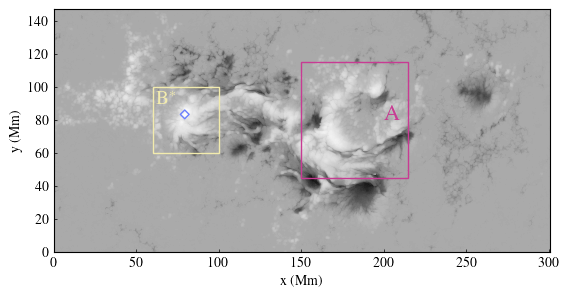

In [16]:
x_grid, y_grid = np.meshgrid(data2d.x, data2d.y)

fig = plt.figure()
ax = fig.add_subplot(111)
C = ax.contourf(
    x_grid,
    y_grid,
    data2d.bz,
    100,
    cmap=cmap,
    # vmin = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].min(),
    # vmax = data3d.lf3D[nresol_y:2*nresol_y, nresol_x:2*nresol_x, iiz, 2].max(),
)
# CS = ax.contour(
#     x_grid,
#     y_grid,
#     data2d.bz,
#     levels=(500, 2000),
#     colors=[(0.576, 1.000, 0.271)],
#     linewidths=1.0,
# )
ax.text(200, 80, r"A", color=c5, fontsize=16)
ax.text(62, 90, r"B$^*$", color=c9, fontsize=14)
ax.scatter(data2d.x[215], data2d.y[225], s=20, marker='D', facecolors='none', edgecolors=c2)
currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle(
        (150, 45), 65, 70, fill=None, alpha=1, zorder=10, color=c5, lw=1.0
    )
)

currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle(
        (60, 60), 40, 40, fill=None, alpha=1, zorder=10, color=c9, lw=1.0
    )
)

ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
# fig.colorbar(C, shrink=0.5)
ax.set_box_aspect(data2d.ny / data2d.nx)
plotname =  "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/May9.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
# result = Fido.search(
#     a.Time("2024/5/9 14:00:00", "2024/5/9 14:01:00"),
#     a.Instrument.hmi,
#     a.Physobs("LOS_magnetic_field"),
# )
# files = Fido.fetch(result[:, 0], path=folder + "/{file}")

In [92]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_09_14_01_30_tai_magnetogram.fits"
data2d = Field2dData.from_fits_SDO(path)

In [ ]:
data2d.bz.shape

In [ ]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_09_14_01_30_tai_magnetogram.fits"
hmi_image = sunpy.map.Map(path).rotate()
top_right = SkyCoord(630 * u.arcsec, -170 * u.arcsec, frame=hmi_image.coordinate_frame)
bottom_left = SkyCoord(220 * u.arcsec, -370 * u.arcsec, frame=hmi_image.coordinate_frame)
hmi_image_cut = hmi_image.submap(bottom_left, top_right=top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=hmi_image_cut)
image = hmi_image_cut.plot(axes=ax, cmap=cmap, norm=norm)

# Make some room and put the title at the top of the figure
# fig.colorbar(image, shrink=0.5)
ax.set_title(ax.get_title(), pad=15)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/GOES_Xray_avg1m_2024_May_sunspots_9.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
result = Fido.search(
    a.Time("2024/05/6 06:11:00", "2024/5/6 06:12:30"),
    a.Instrument.hmi,
    a.Physobs("LOS_magnetic_field"),
)
files = Fido.fetch(result[:, 0], path=folder + "/{file}")

In [ ]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_06_06_12_00_tai_magnetogram.fits"
hmi_image = sunpy.map.Map(path).rotate()
top_right = SkyCoord(0 * u.arcsec, -150 * u.arcsec, frame=hmi_image.coordinate_frame)
bottom_left = SkyCoord(
    -400 * u.arcsec, -350 * u.arcsec, frame=hmi_image.coordinate_frame
)
hmi_image_cut = hmi_image.submap(bottom_left, top_right=top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=hmi_image_cut)
image = hmi_image_cut.plot(axes=ax, cmap=cmap, norm=norm)

# Make some room and put the title at the top of the figure
# fig.colorbar(image, shrink=0.5)
ax.set_title(ax.get_title(), pad=15)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/GOES_Xray_avg1m_2024_May_6_before.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
result = Fido.search(
    a.Time("2024/05/6 16:48:00", "2024/5/6 16:49:0"),
    a.Instrument.hmi,
    a.Physobs("LOS_magnetic_field"),
)
files = Fido.fetch(result[:, 0], path=folder + "/{file}")

In [ ]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_06_16_49_30_tai_magnetogram.fits"
hmi_image = sunpy.map.Map(path).rotate()
top_right = SkyCoord(100 * u.arcsec, -150 * u.arcsec, frame=hmi_image.coordinate_frame)
bottom_left = SkyCoord(
    -300 * u.arcsec, -350 * u.arcsec, frame=hmi_image.coordinate_frame
)
hmi_image_cut = hmi_image.submap(bottom_left, top_right=top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=hmi_image_cut)
image = hmi_image_cut.plot(axes=ax, cmap=cmap, norm=norm)

# Make some room and put the title at the top of the figure
# fig.colorbar(image, shrink=0.5)
ax.set_title(ax.get_title(), pad=15)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/GOES_Xray_avg1m_2024_May_6_after.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
data2d_before = Field2dData.from_fits_SDO("/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_06_06_12_00_tai_magnetogram.fits")

In [ ]:
data2d_after = Field2dData.from_fits_SDO("/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_06_16_49_30_tai_magnetogram.fits")

In [31]:
data3d_before = calculate_magfield(data2d_before, a, 1.0, alpha, 2.0, 0.2)

In [6]:
path2save = "/Users/lilli/Desktop/Thesis/May2024_flare/data_before_mhs"
# data3d_before.save(path2save)
data3d_before = Field3dData.load("/Users/lilli/Desktop/Thesis/May2024_flare/data_before_mhs")

In [7]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dp_before.npy", data3d_before.dpressure)

In [8]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dd_before.npy", data3d_before.ddensity)

In [9]:
data3d_after = calculate_magfield(data2d_after, a, 1.0, alpha, 2.0, 0.2)

In [9]:
path2save = "/Users/lilli/Desktop/Thesis/May2024_flare/data_after_mhs"
# data3d_after.save(path2save)
data3d_after = Field3dData.load("/Users/lilli/Desktop/Thesis/May2024_flare/data_after_mhs")

In [10]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dp_after.npy", data3d_after.dpressure)

In [11]:
np.save("/Users/lilli/Desktop/Thesis/May2024_flare/dd_after.npy", data3d_after.ddensity)

In [ ]:
folder = "/Users/lilli/Desktop/Thesis/May2024_flare/data_before_mhs"

plot(data3d_before, view="los", save=True, path=folder)

In [ ]:
folder = "/Users/lilli/Desktop/Thesis/May2024_flare/data_after_mhs"

plot(data3d_after, view="side", save=True, path=folder)

In [4]:
# ix_max6 = np.unravel_index(data3d_6May.bz.argmax(), data3d_6May.bz.shape)[1]
# iy_max6 = np.unravel_index(data3d_6May.bz.argmax(), data3d_6May.bz.shape)[0]

ix_max7 = np.unravel_index(data3d_7May.bz.argmax(), data3d_7May.bz.shape)[1]
iy_max7 = np.unravel_index(data3d_7May.bz.argmax(), data3d_7May.bz.shape)[0]

# ix_max8 = np.unravel_index(data3d_8May.bz.argmax(), data3d_8May.bz.shape)[1]
# iy_max8 = np.unravel_index(data3d_8May.bz.argmax(), data3d_8May.bz.shape)[0]

# ix_max9 = np.unravel_index(data3d_9May.bz.argmax(), data3d_9May.bz.shape)[1]
# iy_max9 = np.unravel_index(data3d_9May.bz.argmax(), data3d_9May.bz.shape)[0]

# ix_maxb = np.unravel_index(data3d_before.bz.argmax(), data3d_before.bz.shape)[1]
# iy_maxb = np.unravel_index(data3d_before.bz.argmax(), data3d_before.bz.shape)[0]

# ix_maxa = np.unravel_index(data3d_after.bz.argmax(), data3d_after.bz.shape)[1]
# iy_maxa = np.unravel_index(data3d_after.bz.argmax(), data3d_after.bz.shape)[0]

In [ ]:
print(iy_max7, ix_max7)

In [ ]:
data3d_7May.bz.max()